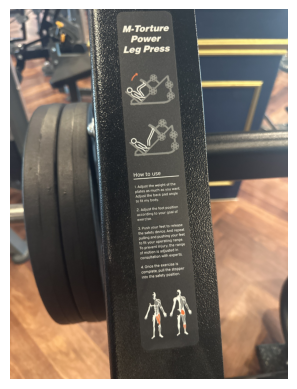

In [8]:
from PIL import Image
import pytesseract
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = './gym.jpg'  

img = mpimg.imread(image_path)

plt.imshow(img)
plt.axis('off')
plt.show()

In [9]:
def tesseract_ocr_extract(image_path):
    image = cv2.imread(image_path)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pytesseract.image_to_data(rgb, output_type=pytesseract.Output.DICT)
    return_list = [{
            "left": results["left"][i],
            "top": results["top"][i],
            "width": results["width"][i],
            "height": results["height"][i],
            "text": results["text"][i],
            "confidence": int(results["conf"][i])
            } for i in range(len(results["text"]))]
    cleaned_data = [item for item in return_list if item.get('text') != '']
    return cleaned_data

result = tesseract_ocr_extract('./gym.jpg')

res_text = []
for idx in range(len(result)):
    if idx == 0:
        res_text.append(result[idx]['text'])
    else:
        if (result[idx]['top'] - result[idx-1]['top']) < 100:
            res_text.append(result[idx]['text'])
        else:
            break
            
final = ' '.join(res_text)
print(final)

M-Torture Power Leg Press


In [10]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

# 검색어 설정
search_keyword = "how to use"
# 찾을 유튜브 채널명 설정
desired_channel = "굿바디휘트니스"

# Selenium WebDriver 설정
service = Service(ChromeDriverManager().install())
options = webdriver.ChromeOptions()
options.add_argument('--no-sandbox')

driver = webdriver.Chrome(service=service, options=options)
driver.get("https://www.youtube.com")

# 검색어로 검색
search_box = driver.find_element(By.XPATH, "//input[@id='search']")
search_box.send_keys(search_keyword + final)
search_box.send_keys(Keys.RETURN)

time.sleep(3)

# 검색 결과에서 유튜브 채널명이 있는 동영상 URL 가져오기
# video_elements = driver.find_elements(By.XPATH, "//a[@id='video-title']")
for i in range(10):
    text = f"//*[@id='contents']/ytd-video-renderer[{i+1}]"
    video_elements = driver.find_elements(By.XPATH, text)
    video_url = driver.find_element(By.XPATH, text+'/div[1]/div/div[1]/div/h3/a')
    for video_element in video_elements:
        found_video_url = video_url.get_attribute("href")
        # 해당 동영상이 원하는 채널명을 포함하는지 확인
        if desired_channel in video_element.text:
            print("Desired video URL:", found_video_url)
            break

driver.quit()


Desired video URL: https://www.youtube.com/watch?v=0WWTcVbQgT4&pp=ygUjaG93IHRvIHVzZU0tVG9ydHVyZSBQb3dlciBMZWcgUHJlc3M%3D


In [11]:
title = final.split()
print(title[-2:])
searching = ' '.join(title[-2:])
print(searching)

['Leg', 'Press']
Leg Press


In [12]:
service = Service(executable_path = ChromeDriverManager().install())
options = webdriver.ChromeOptions()
options.add_argument('--no-snadbox')

st = 3

driver = webdriver.Chrome(service = service)
time.sleep(st)

driver.get("https://terms.naver.com/")
time.sleep(st)

search_box = driver.find_element_by_name("query")
search_box.send_keys(searching)
search_box.send_keys(Keys.ENTER)

time.sleep(st)

desired_text = "동영상으로 배우는 근력운동"

# for element in elements:
#     element_text = element.text
#     print(element_text)
#     if desired_text in element_text:
#         print(element_text)
#         print(desired_text)
#         break
# for ele in elements:
#     print(ele.text)

elements = driver.find_elements_by_class_name("search_result_area")

for element in elements:
    # "search_group" 클래스를 가진 하위 요소에서 "content_list" 클래스를 가진 하위 요소 찾기
    content_list = element.find_element_by_class_name("content_list")
    # "content_list" 클래스를 가진 하위 요소에서 li 요소 찾기
    li_elements = content_list.find_elements_by_tag_name("li")
    # 각 li 요소에서 "info_area" 클래스를 가진 하위 요소에 접근하기
    for li_element in li_elements:
        info_area = li_element.find_element_by_class_name("info_area")
        info_area2 = li_element.find_element_by_class_name("thumb_area")
        if desired_text in element.text:
            info_area2.click()
            break
    break
        
# extracted = driver.find_element(By.XPATH, '//*[@id="size_ct"]')
# print(extracted.text)

speech = ''
keyword = "주의 사항"
found_keyword = False

extracted_eles = driver.find_elements(By.XPATH, '//*[@id="size_ct"]//h3 | //*[@id="size_ct"]//p')
# for ele in extracted_eles:
#     print(ele.text)
#     if ele.text == '주의 사항':
#         speech += ele.text + '\n'
#     while (ele.text != '주의 사항'):

for ele in extracted_eles:
    text = ele.text
    print(text)
    if found_keyword:
        speech += text + '\n'
    elif keyword in text:
        found_keyword = True
        speech += text + '\n'
        

time.sleep(st)

video_element = video_element = driver.find_element_by_class_name("webplayer-internal-video")

play_button = driver.find_element(By.XPATH, '//*[@id="prism_body_video"]/div/button')
play_button.click()

video_element = driver.find_element_by_tag_name("video")


src_value = video_element.get_attribute("src")

if src_value.strip() == "":
    print("Video src is empty")
else:
    print("Video src:", src_value)
    
extracted_img = driver.find_element(By.XPATH, '//*[@id="relatedImagesUl"]')

# extracted_img 요소에서 li에 있는 a 요소의 src 속성 추출
a_elements = extracted_img.find_elements(By.XPATH, ".//li//a//img")
for a_element in a_elements:
    src_value = a_element.get_attribute("src")
    print("Image src:", src_value)


driver.quit()

C:\Users\seok\AppData\Local\Temp\ipykernel_1108\4084554833.py:13: DeprecationWarning: find_element_by_name is deprecated. Please use find_element(by=By.NAME, value=name) instead
  search_box = driver.find_element_by_name("query")
C:\Users\seok\AppData\Local\Temp\ipykernel_1108\4084554833.py:31: DeprecationWarning: find_elements_by_class_name is deprecated. Please use find_elements(by=By.CLASS_NAME, value=name) instead
  elements = driver.find_elements_by_class_name("search_result_area")
C:\Users\seok\AppData\Local\Temp\ipykernel_1108\4084554833.py:35: DeprecationWarning: find_element_by_class_name is deprecated. Please use find_element(by=By.CLASS_NAME, value=name) instead
  content_list = element.find_element_by_class_name("content_list")
C:\Users\seok\AppData\Local\Temp\ipykernel_1108\4084554833.py:37: DeprecationWarning: find_elements_by_tag_name is deprecated. Please use find_elements(by=By.TAG_NAME, value=name) instead
  li_elements = content_list.find_elements_by_tag_name("li")
C

목차
운동 개요
대퇴사두근과 둔근을 강화시켜주는 대표적이고 필수적인 하체 운동이다. 초보자가 실시하기에 가장 적당한 하체 운동이며 스쿼트에 비해 허리에 가해지는 부하가 적어 비교적 무거운 무게로 운동을 할 수 있는 장점이 있다. 또한 발판의 지지 위치에 변화를 줄 경우 좀 더 집중적인 근력 향상을 꾀할 수 있다.
운동 순서
머신에 앉아 엉덩이와 어깨를 밀착시킨다.
양발을 발판에 대고 어깨너비만큼 벌린 다음 무릎을 편다.
앉는다는 느낌으로 천천히 무릎이 90도가 될 때까지 구부린다.
발뒤꿈치로 민다는 느낌으로 허벅지에 힘을 주면서 무릎을 편다.
주의 사항
무릎을 완전히 펴지 말고 약간 구부려주는 것이 운동 효과에 좋다.
대퇴사두근의 힘으로 지탱하며 지속적으로 실시한다.
엉덩이와 허리가 항상 기구에 밀착해 있어야 한다.
운동팁
발판의 보폭을 좁게 하면 대퇴부 바깥쪽이, 넓게 하면 대퇴부 안쪽이 발달된다.
발을 발판의 윗쪽에 대고 하면 대둔근이, 발을 발판의 아래쪽에 대고 하면 대퇴사두근 아래쪽이 발달된다.


C:\Users\seok\AppData\Local\Temp\ipykernel_1108\4084554833.py:73: DeprecationWarning: find_element_by_class_name is deprecated. Please use find_element(by=By.CLASS_NAME, value=name) instead
  video_element = video_element = driver.find_element_by_class_name("webplayer-internal-video")
C:\Users\seok\AppData\Local\Temp\ipykernel_1108\4084554833.py:78: DeprecationWarning: find_element_by_tag_name is deprecated. Please use find_element(by=By.TAG_NAME, value=name) instead
  video_element = driver.find_element_by_tag_name("video")


Video src: https://b01-kr-naver-vod.pstatic.net/ncc/c/read/v2/VOD_ALPHA/TVCAST_2015_04_26_4/531C04F3C37FF31C32E3027F53FF3113CC5_muploader_o_720P_1280_2048_192_B.mp4?_lsu_sa_=61e540f2415b6f76b3dc85b16795f5b6de0d3f28a00aefff35f7b2c9273536a5df279a1368f53e0f40ce3d1238349ba4684b6a6a8c144e4ead53bf145c99a69c708266746727845fd909e97ca2a3750b
Image src: https://dbscthumb-phinf.pstatic.net/2009_000_1/20120315140202190_HHN0DCKWH.jpg/WEIGHT_101_mus_1.jpg?type=r100&wm=N
Image src: https://dbscthumb-phinf.pstatic.net/2009_000_1/20120315140202311_0I9TX4S5Z.jpg/WEIGHT_101_mus_2.jpg?type=r100&wm=N
Image src: https://dbscthumb-phinf.pstatic.net/2009_000_1/20120315140202626_NNPQ3TPOX.jpg/WEIGHT_101_mus_3.jpg?type=r100&wm=N


In [13]:
print(speech)

주의 사항
무릎을 완전히 펴지 말고 약간 구부려주는 것이 운동 효과에 좋다.
대퇴사두근의 힘으로 지탱하며 지속적으로 실시한다.
엉덩이와 허리가 항상 기구에 밀착해 있어야 한다.
운동팁
발판의 보폭을 좁게 하면 대퇴부 바깥쪽이, 넓게 하면 대퇴부 안쪽이 발달된다.
발을 발판의 윗쪽에 대고 하면 대둔근이, 발을 발판의 아래쪽에 대고 하면 대퇴사두근 아래쪽이 발달된다.



In [14]:
from gtts import gTTS
import os


# TTS 객체 생성
tts = gTTS(text=speech, lang='ko')

# 오디오 파일로 저장
tts.save("output.mp3")

# 오디오 파일 재생 (플랫폼에 따라 다를 수 있음)
os.system("start output.mp3")  # Windows

0